# Multi-file Plots
In this notebook, we create visualizations using multiple files of the dataset.

In [1]:
import pandas as pd
import math
import numpy as np
import os
%matplotlib inline

In [2]:
movies_file = os.path.join(os.path.pardir, 'processed', 'movies_processed.dat')
movies_df = pd.read_csv(movies_file)

In [3]:
movies_df[:10]

,id,year,genres
0,1,1995,Animation|Children's|Comedy
1,2,1995,Adventure|Children's|Fantasy
2,3,1995,Comedy|Romance
3,4,1995,Comedy|Drama
4,5,1995,Comedy
5,6,1995,Action|Crime|Thriller
6,7,1995,Comedy|Romance
7,8,1995,Adventure|Children's
8,9,1995,Action
9,10,1995,Action|Adventure|Thriller


In [4]:
ratings_file = os.path.join(os.path.pardir, 'processed', 'ratings_processed.csv')
ratings_df = pd.read_csv(ratings_file)

In [5]:
ratings_df[:10]

,user,movie,rating
0,2783,1253,5
1,2783,589,5
2,2783,1270,4
3,2783,1274,4
4,2783,741,5
5,2783,750,5
6,2783,924,5
7,2783,2407,4
8,2783,3070,3
9,2783,208,1


In [6]:
users_file = os.path.join(os.path.pardir, 'processed', 'users_processed.dat')
users_df = pd.read_csv(users_file, sep='::', engine='python')

In [7]:
users_df[:10]

,id,gender,age_group,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


Now we'll get the list of genres

In [8]:
split_genres = [row.split('|') for row in movies_df.genres]
genre_list = np.concatenate(split_genres)

In [9]:
genre_list

array(['Animation', "Children's", 'Comedy', ..., 'Drama', 'Drama',
       'Thriller'], dtype='<U11')

In [10]:
unique_genres = np.unique(genre_list)

In [11]:
unique_genres

array(['Action', 'Adventure', 'Animation', "Children's", 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'], dtype='<U11')

**Question 1:** What genres have the highest median rating?  
Answering this question is one way to figure out what kind of movies to show more. This doesn't mean we need to ignore other genres, but perhaps we could suggest movies according to this.  

**Related Question:** What genre has the highest number of 5-star ratings?

In [12]:
# Movies, genres, and rating DataFrame
movies_df.columns = ['movie', 'year', 'genres']
mgr_df = movies_df.merge(ratings_df, how='inner', on='movie')

In [13]:
np.unique(ratings_df['rating'])

array([1, 2, 3, 4, 5])

In [14]:
mgr_df[:10]

,movie,year,genres,user,rating
0,1,1995,Animation|Children's|Comedy,2787,5
1,1,1995,Animation|Children's|Comedy,2788,5
2,1,1995,Animation|Children's|Comedy,2792,3
3,1,1995,Animation|Children's|Comedy,2796,3
4,1,1995,Animation|Children's|Comedy,2799,5
5,1,1995,Animation|Children's|Comedy,2806,2
6,1,1995,Animation|Children's|Comedy,2807,3
7,1,1995,Animation|Children's|Comedy,2809,5
8,1,1995,Animation|Children's|Comedy,2810,4
9,1,1995,Animation|Children's|Comedy,2812,3


In [15]:
genre_rating_maps = {}
for genre in unique_genres:
    genre_rating_maps[genre] = []

In [16]:
genre_rating_maps

{'Action': [],
 'Adventure': [],
 'Animation': [],
 "Children's": [],
 'Comedy': [],
 'Crime': [],
 'Documentary': [],
 'Drama': [],
 'Fantasy': [],
 'Film-Noir': [],
 'Horror': [],
 'Musical': [],
 'Mystery': [],
 'Romance': [],
 'Sci-Fi': [],
 'Thriller': [],
 'War': [],
 'Western': []}

Caution: The cell below may take quite a long time.

In [17]:
for _, row in mgr_df.iterrows():
    cur_genres = row['genres'].split('|')
    for genre in cur_genres:
        genre_rating_maps[genre].append(row['rating'])

In [18]:
np.unique(genre_rating_maps['Action'])

array([1, 2, 3, 4, 5])

In [19]:
mean_genre_ratings = { genre: np.mean(genre_rating_maps[genre]) for genre in unique_genres }

In [20]:
mean_genre_ratings

{'Action': 3.5179209577949004,
 'Adventure': 3.49860188745194,
 'Animation': 3.712814811234108,
 "Children's": 3.44031477340278,
 'Comedy': 3.5405990412619985,
 'Crime': 3.7325746104625606,
 'Documentary': 3.944087747458534,
 'Drama': 3.778878899332516,
 'Fantasy': 3.473888534354393,
 'Film-Noir': 4.083637534893708,
 'Horror': 3.2375813810427028,
 'Musical': 3.6805308861259127,
 'Mystery': 3.69995129079396,
 'Romance': 3.6272556390977444,
 'Sci-Fi': 3.492791514155524,
 'Thriller': 3.6062334972819055,
 'War': 3.9075070458621575,
 'Western': 3.6725688073394496}

In [21]:
median_genre_ratings = { genre: np.median(genre_rating_maps[genre]) for genre in unique_genres }

In [22]:
median_genre_ratings

{'Action': 4.0,
 'Adventure': 4.0,
 'Animation': 4.0,
 "Children's": 4.0,
 'Comedy': 4.0,
 'Crime': 4.0,
 'Documentary': 4.0,
 'Drama': 4.0,
 'Fantasy': 4.0,
 'Film-Noir': 4.0,
 'Horror': 3.0,
 'Musical': 4.0,
 'Mystery': 4.0,
 'Romance': 4.0,
 'Sci-Fi': 4.0,
 'Thriller': 4.0,
 'War': 4.0,
 'Western': 4.0}

This doesn't tell us anything at all, really. Horror has an unusually low median, so either people don't like that genre, or there are many ratings on the lower side.

In [23]:
import operator
sorted_mean_ratings = sorted(mean_genre_ratings.items(), key=operator.itemgetter(1), reverse=True)

In [24]:
sorted_mean_ratings

[('Film-Noir', 4.083637534893708),
 ('Documentary', 3.944087747458534),
 ('War', 3.9075070458621575),
 ('Drama', 3.778878899332516),
 ('Crime', 3.7325746104625606),
 ('Animation', 3.712814811234108),
 ('Mystery', 3.69995129079396),
 ('Musical', 3.6805308861259127),
 ('Western', 3.6725688073394496),
 ('Romance', 3.6272556390977444),
 ('Thriller', 3.6062334972819055),
 ('Comedy', 3.5405990412619985),
 ('Action', 3.5179209577949004),
 ('Adventure', 3.49860188745194),
 ('Sci-Fi', 3.492791514155524),
 ('Fantasy', 3.473888534354393),
 ("Children's", 3.44031477340278),
 ('Horror', 3.2375813810427028)]

The above is the descending order of mean ratings of each genre. Thus, from the mean and median genre ratings, we conclude that horror movies aren't liked as much. In contrast, Film-Noir and Documentary films seem to have the highest mean ratings.  

This doesn't necessarily mean that they're the most liked. In notebook 2, we remarked how Film-Noir had the least number of ratings. Thus, one way to interpret this is that only people who like the Film-Noir genre watch and rate those movies, but a much larger number of people watch other genres, and some people watching those genres, having been disappointed by some movie, might have given lower ratings. Alternatively, a few bad movies in some genre could bring down its mean rating.  

One thing to note, is that Drama movies have the fourth-highest mean rating, but they also have the most number of ratings (from notebook 2). This means these movies are consistently good.  

**Conclusion #1:** Drama movies are consistently good, as they have the highest number of ratings and a high mean rating. People who watch film-noir, documentary, and war movies tend to like and give higher ratings to other movies in those genres as well. Horror movies don't seem to perform very well.

We now plot the distribution of ratings for each genre.

In [25]:
import matplotlib.pyplot as plt

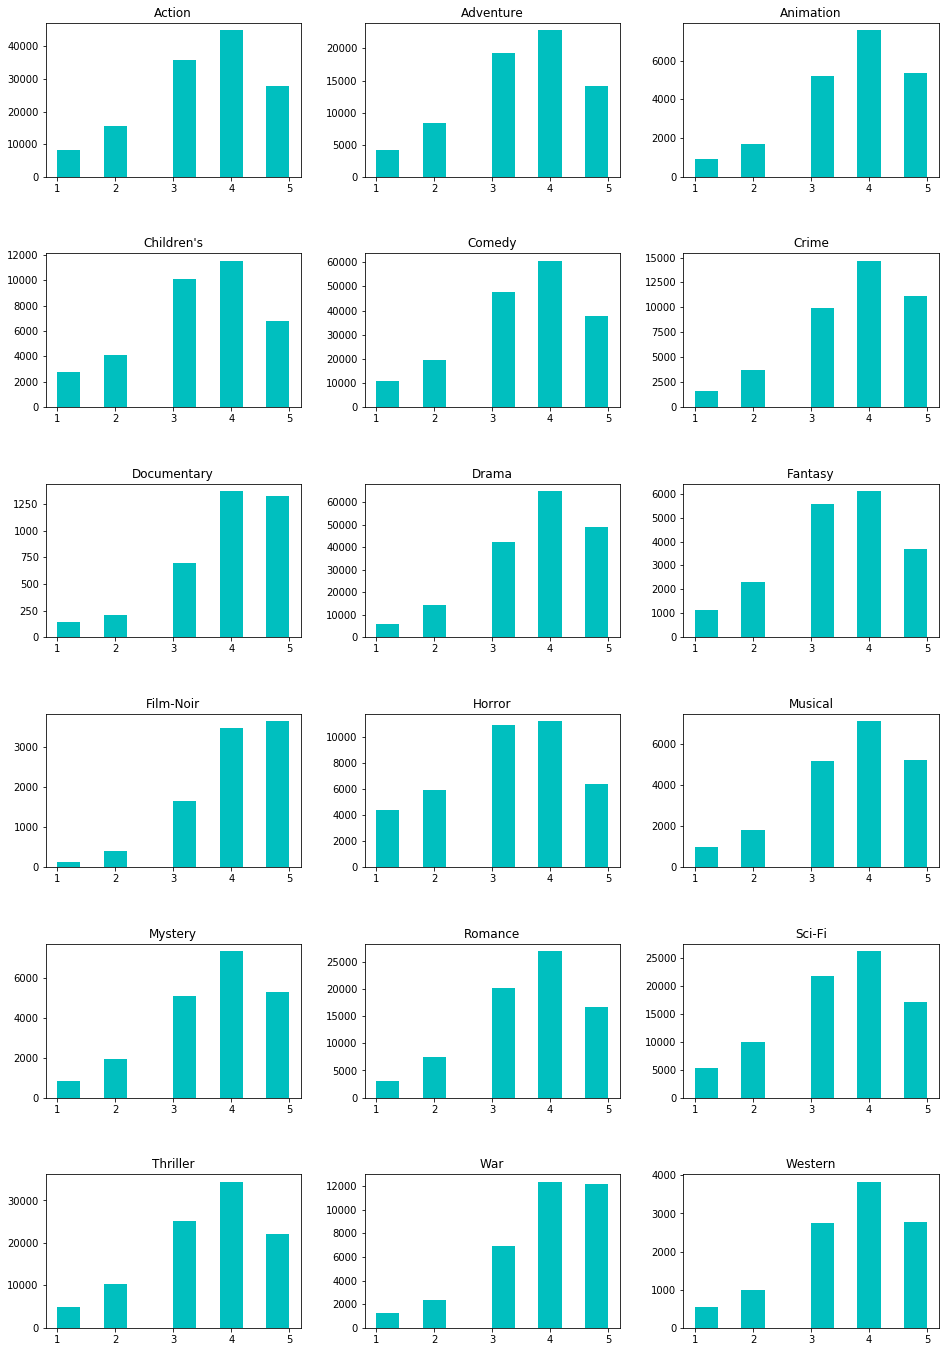

In [26]:
i = 0
plt.figure(figsize=(16, 24))
plt.subplots_adjust(wspace=0.25, hspace=0.5)
for genre, ratings in genre_rating_maps.items():
    plt.subplot(6, 3, i + 1)
    plt.title(genre)
    plt.hist(ratings, color='c')
    i += 1
plt.show()

Unsurprisingly, drama also has the highest number of 5-star ratings.

We now look at our next question:

**Question 2:** What age groups like what genres the most?  
This directly helps give targeted suggestions, and helps give an even more solid business model. We'll go one step further and do this analysis for both genders separately, as well as combining the genders.

In [27]:
# Just to recap:
print(movies_df.columns)
print(users_df.columns)
print(ratings_df.columns)

Index(['movie', 'year', 'genres'], dtype='object')
Index(['id', 'gender', 'age_group', 'occupation', 'zip_code'], dtype='object')
Index(['user', 'movie', 'rating'], dtype='object')


We need to find, for each age group, the highest rated genre (basically, what we did above, but for each age group). We write a function here, because we need to do this for other groupings as well. For the original code without the function, see [this commit](https://github.com/yrahul3910/movie-dataset-analysis/commit/6ef2af527e03709c78f006c5eb2080d34d2fef2d).

In [56]:
import seaborn as sns
sns.set_style('whitegrid')

In [80]:
def get_grouped_genre_ranks(group:str, plot:bool=False, group_titles:list=None, plot_grid:tuple=None, 
                            grid_spacing:tuple=(0.25, 0.5), plot_size:tuple=(16,24)):
    grouped_users = list(users_df.groupby(group))
    
    # An array of the counts of viewers for genres across various the groups. 
    # View comment at the bottom for details.
    group_genre_counts = []
    sorted_ratings = []

    for i in range(len(grouped_users)):
        rating_map = {}
        for genre in unique_genres:
            rating_map[genre] = []

        cur_group = grouped_users[i][0]
        cur_df = grouped_users[i][1]
        rating_subset = ratings_df[ratings_df['user'].isin(cur_df['id'])]
        mgr_df = movies_df.merge(rating_subset, how='inner', on='movie')

        for _, row in mgr_df.iterrows():
            cur_genres = row['genres'].split('|')
            for genre in cur_genres:
                rating_map[genre].append(row['rating'])

        mean_genre_ratings = { genre: np.mean(rating_map[genre]) for genre in unique_genres }
        sorted_mean_ratings = sorted(mean_genre_ratings.items(), key=operator.itemgetter(1), reverse=True)        
        sorted_ratings.append(sorted_mean_ratings)
        
        # We also need the number of ratings for each genre for each group
        # We'll collect that data in a map.
        cur_group_genre_counts = {}

        for genre in rating_map:
            cur_group_genre_counts[genre] = len(rating_map[genre])

        group_genre_counts.append(cur_group_genre_counts)
    
    if (plot):
        plt.figure(figsize=plot_size)
        plt.subplots_adjust(wspace=grid_spacing[0], hspace=grid_spacing[1])

        for i in range(len(group_genre_counts)):
            total_count = sum(group_genre_counts[i].values())
            plt.subplot(plot_grid[0], plot_grid[1], i + 1)
            df = pd.DataFrame(
                {'Genre': [genre for genre in group_genre_counts[i]],
                'Percentage': [(group_genre_counts[i][genre] * 100 / total_count) for genre in group_genre_counts[i]]
                }
            )
            plt.title(group_titles[i])
            ax = sns.barplot(x='Genre', y='Percentage', data=df, alpha=0.4)
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        plt.show()
        
    return (group_genre_counts, sorted_ratings)

In [61]:
age_group_titles = ["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"]

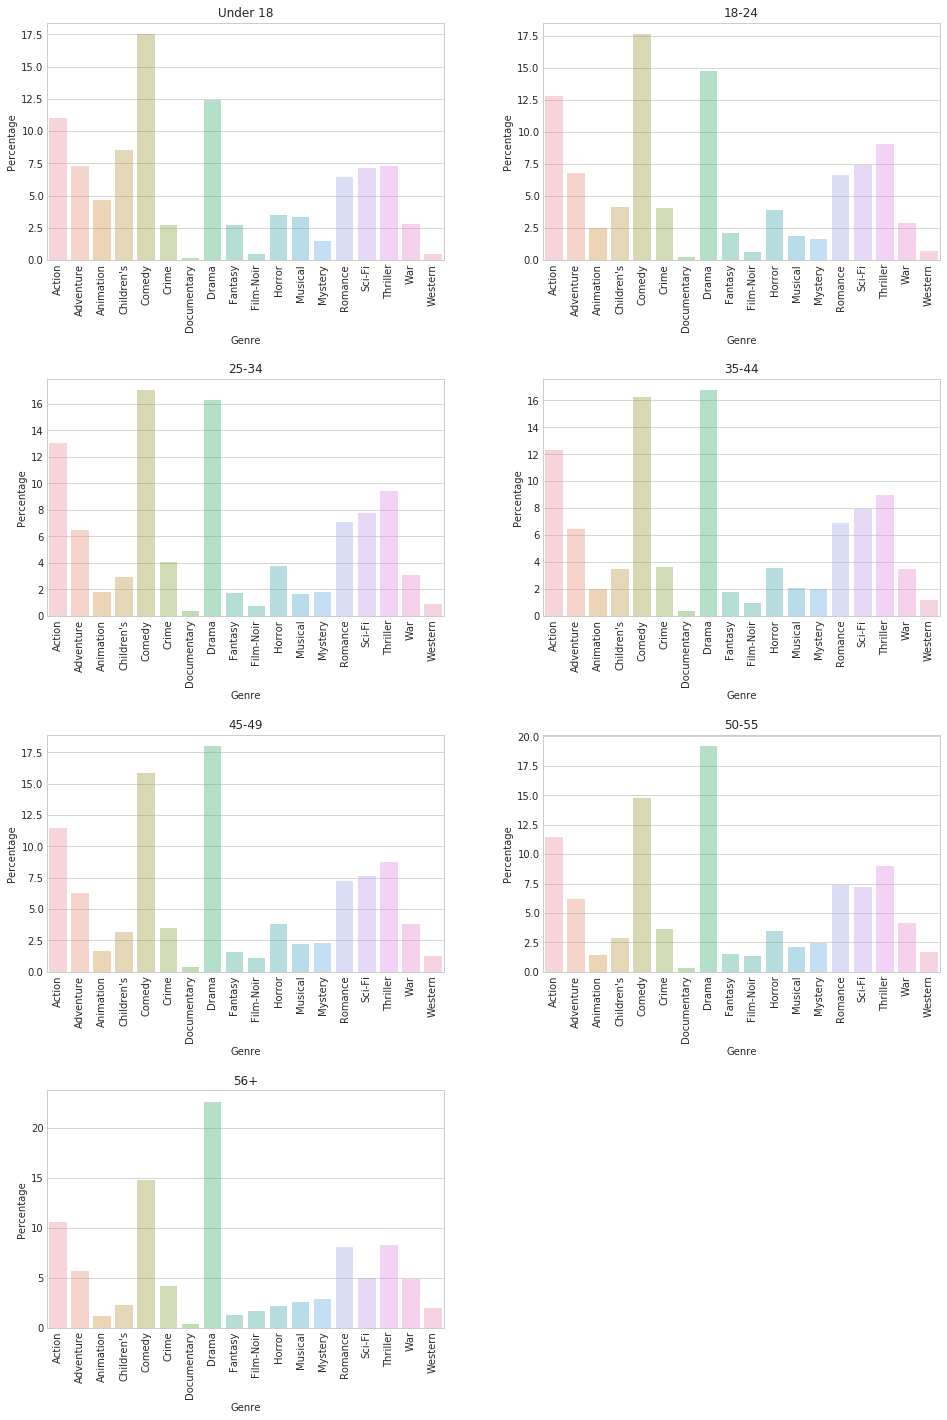

In [62]:
age_genre_counts, age_genre_ratings = get_grouped_genre_ranks('age_group', 
                                                              plot=True, 
                                                              group_titles=age_group_titles, 
                                                              plot_grid=(4,2))

We can conclude a lot from what we have so far.  
1. Action movies grow in popularity as children grow to adults, till it reaches a peak at around the time that people turn around 30, after which its popularity slowly dwindles.  
2. Drama movies get increasingly popular as people grow older, and by old age, it dominates the number of movies people watch, grabbing over a quarter of the total views.  
3. Comedy movies start off well, but people seem to watch them less as they grow older.  
4. Although Thriller and Sci-Fi movies maintain a rather steady number of viewers, elderly people (above 56) tend not to watch them as much as younger people.  
5. Romance movies have their highest viewership from people between 25 and 44, after which their charm wanes.  
6. The age groups show similar rankings for the mean genre ratings, with some exceptions. The Crime genre is slowly pushed down as the age increases, being slowly pushed down by Musical and Mystery. Adolescents don't seem to like documentaries much, but that trend doesn't continue for other age groups, where the genre shoots up in mean rating.  
7. Film-Noir, Documentary, War, Drama, and Crime maintain the top few ranking positions across most age groups. Since this ordering is similar to the one obtained before, and seeing how the percentage of viewership (from the bar graphs) follows similar trends, we conclude that with a few exceptions, the popularity of various genres across age groups follows the same distribution as that of all the data together.  

**Conclusion**: The genre popularity trends across various age groups are similar to the trends for the whole dataset, with some exceptions as discussed above. While Action movies shoot up in popularity and then slowly dwindle, and Comedy movies go on a constant decline in viewership percentage, Drama movies slowly dominate the viewership percentage.

**Related Question**: What is the distribution of viewership across age groups?

In [63]:
viewership = [sum(item.values()) for item in age_genre_counts]

In [64]:
viewership

[21171, 177325, 443748, 217594, 92075, 72478, 35609]

In [65]:
from scipy import stats

/usr/local/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


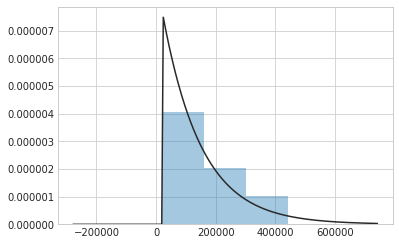

In [66]:
sns.distplot(viewership, kde=False, fit=stats.expon);

/usr/local/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


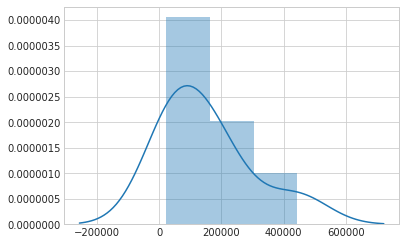

In [67]:
sns.distplot(viewership);

**Conclusion**: The viewership seems to follow an Exponential distribution, and declines as people grow older.

**Question 3**: What occupations watch what genres?

In [68]:
occupation_group_titles = [
    'Other',
    'Academic',
    'Artist',
    'Admin/Clerical',
    'College/Grad Student',
    'Customer Service',
    'Doctor/Healthcare',
    'Executive/Manager',
    'Farmer',
    'Homemaker',
    'K-12 Student',
    'Lawyer',
    'Programmer',
    'Retired',
    'Sales/Marketing',
    'Scientist',
    'Self-employed',
    'Technician/Engineer',
    'Tradesman/Craftsman',
    'Unemployed',
    'Writer'
]

/usr/local/lib64/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib64/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


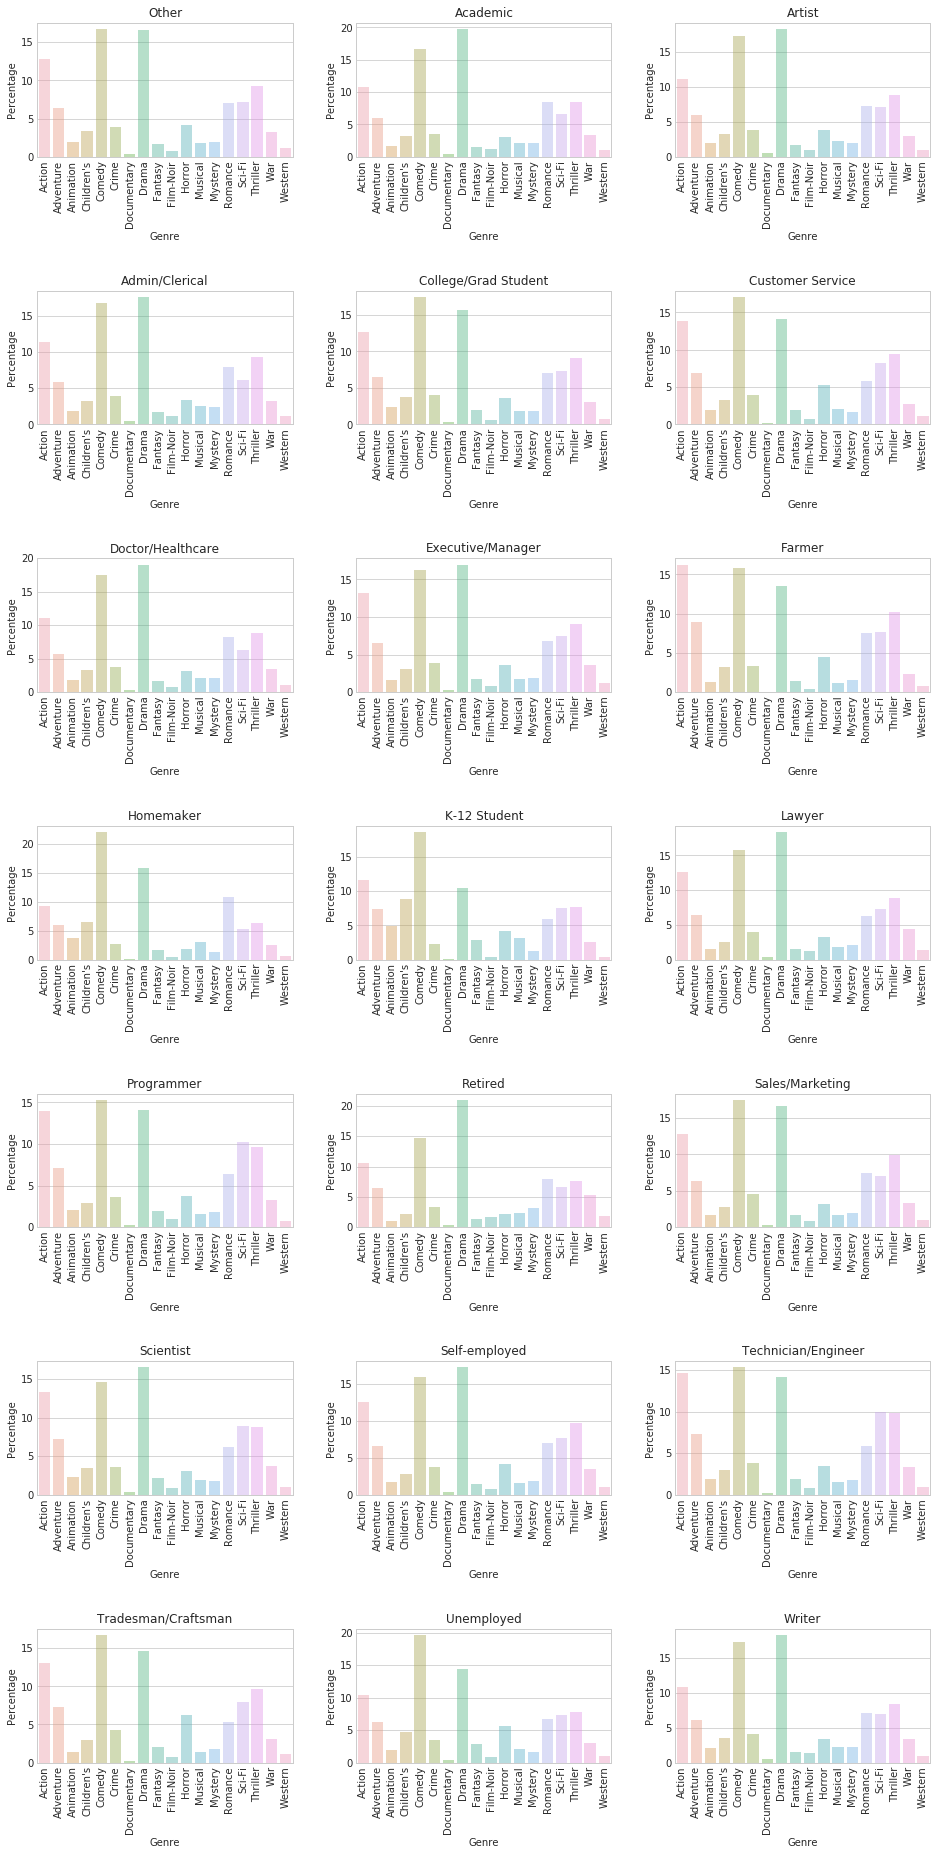

In [83]:
occ_genre_counts, occ_genre_ratings = get_grouped_genre_ranks('occupation', 
                                                             plot=True, 
                                                             group_titles=occupation_group_titles,
                                                             plot_grid=(7,3),
                                                             plot_size=(16, 32),
                                                             grid_spacing=(0.25, 1)
                                                            )

In [85]:
occ_genre_ratings

[[('Film-Noir', 4.041272570937231),
  ('War', 3.8407685512367493),
  ('Documentary', 3.7705223880597014),
  ('Drama', 3.7215923730997167),
  ('Animation', 3.700484893696382),
  ('Musical', 3.647709923664122),
  ('Crime', 3.63166455810591),
  ('Western', 3.6212792906903104),
  ('Mystery', 3.5970982142857144),
  ('Romance', 3.5798540737738143),
  ('Thriller', 3.503195011163292),
  ('Comedy', 3.482186286640782),
  ('Fantasy', 3.4603854389721627),
  ("Children's", 3.456350053361793),
  ('Adventure', 3.422326307572209),
  ('Action', 3.4067334446299387),
  ('Sci-Fi', 3.3861682990205875),
  ('Horror', 3.104105317858999)],
 [('Film-Noir', 4.13265306122449),
  ('Documentary', 4.069587628865979),
  ('War', 3.9171579273968353),
  ('Drama', 3.757074840849516),
  ('Animation', 3.738213399503722),
  ('Mystery', 3.7125),
  ('Musical', 3.709935097353969),
  ('Crime', 3.6845342706502637),
  ('Western', 3.6636904761904763),
  ('Romance', 3.6120252381541507),
  ('Thriller', 3.542343242568074),
  ('Comedy

Our insights for this are as follows:  
1. Comedy and Drama are the two most viewed genres in every occupation. Unemployed people watch the most comedy movies, and relatively less drama movies.  
2. Action enjoys a lot of popularity too, but farmers and technicians/engineers in particular enjoy it the most; in case of farmers, it has the highest viewership among all genres.  
3. As expected, K-12 students watch the most Children's movies.  
4. Among all occupations, technicians/engineers, self-employed people, and tradesmen/craftsmen seem to enjoy thriller movies the most. A similar trend is observed for sci-fi movies.  
5. Documentaries remain the least viewed of all genres. However, with some exceptions, they have the highest mean ratings. It would appear that the people who watch documentaries love them, and so rate them higher. Admin/clerical staff, tradesmen/craftsmen, and retired people rate documentaries poorly. Farmers don't watch documentaries at all, according to the dataset. K-12 students rate documentaries an unusually low mean of 2.88.  

**Conclusion**: Comedy, drama, and action are the most popular movies across all occupations. Children's movies are enjoyed by K-12 students the most, while thriller and sci-fi movies catch the attention of technicians/engineers, self-employed people, and tradesmen/craftsmen. Documentaries, though claiming the highest mean ratings for most occupations, have poor viewership, with farmers not watching them at all.

**Question**: What gender likes what genres?

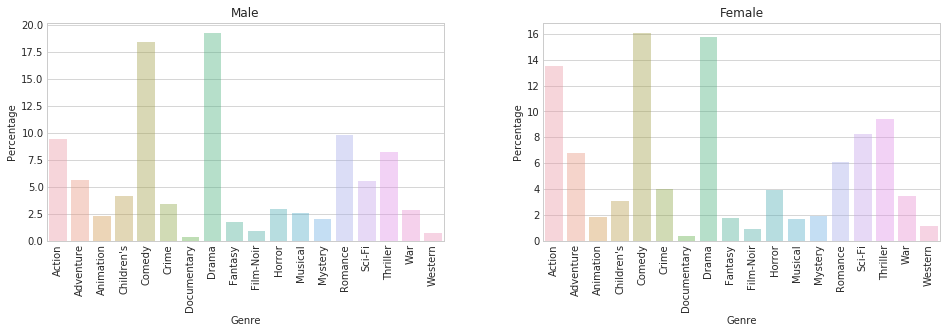

In [89]:
gender_genre_counts, gender_genre_ratings = get_grouped_genre_ranks('gender', 
                                                                 plot=True, 
                                                                 group_titles=['Male', 'Female'],
                                                                 plot_grid=(1,2),
                                                                 plot_size=(16, 4)
                                                                )

In [92]:
gender_genre_counts

[{'Action': 24715,
  'Adventure': 14679,
  'Animation': 6023,
  "Children's": 10757,
  'Comedy': 48557,
  'Crime': 8802,
  'Documentary': 968,
  'Drama': 50529,
  'Fantasy': 4642,
  'Film-Noir': 2258,
  'Horror': 7676,
  'Musical': 6659,
  'Mystery': 5375,
  'Romance': 25738,
  'Sci-Fi': 14560,
  'Thriller': 21568,
  'War': 7385,
  'Western': 1878},
 {'Action': 107923,
  'Adventure': 53985,
  'Animation': 14664,
  "Children's": 24570,
  'Comedy': 127925,
  'Crime': 32144,
  'Documentary': 2770,
  'Drama': 125655,
  'Fantasy': 14162,
  'Film-Noir': 7056,
  'Horror': 31338,
  'Musical': 13609,
  'Mystery': 15155,
  'Romance': 48742,
  'Sci-Fi': 65762,
  'Thriller': 75007,
  'War': 27742,
  'Western': 9022}]

In [91]:
gender_genre_ratings

[[('Film-Noir', 4.028343666961913),
  ('Documentary', 3.977272727272727),
  ('War', 3.907650643195667),
  ('Musical', 3.8381138309055416),
  ('Animation', 3.8108915822679728),
  ('Drama', 3.78170951334877),
  ('Mystery', 3.7190697674418605),
  ('Crime', 3.7182458532151785),
  ('Romance', 3.699937835107623),
  ('Thriller', 3.620178041543027),
  ("Children's", 3.6121595240308637),
  ('Comedy', 3.600284202071792),
  ('Western', 3.570287539936102),
  ('Adventure', 3.537230056543361),
  ('Action', 3.5243374468945983),
  ('Fantasy', 3.522834984920293),
  ('Sci-Fi', 3.481456043956044),
  ('Horror', 3.2505211047420532)],
 [('Film-Noir', 4.101332199546485),
  ('Documentary', 3.932490974729242),
  ('War', 3.907468819839954),
  ('Drama', 3.777740639051371),
  ('Crime', 3.7364982578397212),
  ('Western', 3.693859454666371),
  ('Mystery', 3.6931705707687232),
  ('Animation', 3.67253136933988),
  ('Musical', 3.603424204570505),
  ('Thriller', 3.6022237924460385),
  ('Romance', 3.588876123261253),
  

We observe the following:  
1. Comedy and Drama are the most popular genres among both genres, men watching them more than women.  
2. Action movies are significantly more popular among women than men.  
3. Romance movies are watched more by men than by women.  
4. Sci-Fi and Thriller movies enjoy similar popularity among both genders, and Sci-Fi movies are watched by significantly more women than men.